In [1]:
!pwd

/c/Users/Windows10/code/GuiVdwinden/greeneye/notebooks


In [2]:
import pandas as pd

In [3]:
data= pd.read_csv('../EncodedData.csv')

In [4]:
alltags = [ 'clear', 'cloudy', 'haze', 'partly cloudy',        #the cloud coverage goes first!     
           'agriculture', 'artisinal mine', 'bare ground', 'blooming', 
           'blow down', 'cultivation', 'habitation', 'primary', 'road', 
        'selective logging', 'conventional mine', 'slashu burn','water']

#  load the dataset and tweak the names of the files so you can make it compatible

In [10]:
data.head()

,image_name,tags,taglist,clear,cloudy,haze,partly cloudy,agriculture,artisinal mine,bare ground,...,blow down,cultivation,habitation,primary,road,selective logging,conventional mine,slashu burn,water,result_id
0,train_0,haze primary,"['haze', 'primary']",0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,'00100000000100000'
1,train_1,agriculture clear primary water,"['clear', 'agriculture', 'primary', 'water']",1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,'10001000000100001'
2,train_2,clear primary,"['clear', 'primary']",1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,'10000000000100000'
3,train_3,clear primary,"['clear', 'primary']",1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,'10000000000100000'
4,train_4,agriculture clear habitation primary road,"['clear', 'agriculture', 'habitation', 'primar...",1,0,0,0,1,0,0,...,0,0,1,1,1,0,0,0,0,'10001000001110000'


In [14]:
data['image_name'] = data['image_name'] + '.jpg'

In [15]:
data['image_name'].head()

0    train_0.jpg
1    train_1.jpg
2    train_2.jpg
3    train_3.jpg
4    train_4.jpg
Name: image_name, dtype: object

-----

[the documents for imagedatagenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#random_transform)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [135]:
#instantiate the data generator and input the transformatons you want
datagen = ImageDataGenerator()
test_datagen=ImageDataGenerator()

----

In [136]:
train_generator = datagen.flow_from_dataframe(
                                            dataframe=data[0:700],
                                            directory="../notebooks/sample/",
                                            x_col="image_name",
                                            y_col=alltags,
                                            batch_size=32,
                                            seed=42,
                                            shuffle=False,
                                            class_mode="raw",  #look into this later
                                            #target_size=(100,100)
)

Found 700 validated image filenames.


In [80]:
valid_generator=test_datagen.flow_from_dataframe(
                                                dataframe=data[700:1000],
                                                directory="../notebooks/sample/",
                                                x_col="image_name",
                                                y_col=alltags,
                                                batch_size=32,
                                                seed=42,
                                                shuffle=False,
                                                class_mode="raw",
                                                #target_size=(100,100)
)

Found 300 validated image filenames.


In [101]:
test_generator=test_datagen.flow_from_dataframe(
                                                dataframe=data[1000:1200],
                                                directory="../notebooks/sample/",
                                                x_col="image_name",
                                                y_col=alltags,
                                                batch_size=32,
                                                seed=42,
                                                shuffle=False,
                                                class_mode="raw",
                                                #target_size=(100,100)
)

Found 200 validated image filenames.


In [102]:
sample_predict=test_datagen.flow_from_dataframe(
                                                dataframe=data[1200:1201],
                                                directory="../notebooks/sample/",
                                                x_col="image_name",
#                                                y_col=alltags,
                                                batch_size=32,
                                                seed=42,
                                                shuffle=False,
                                                class_mode=None,
                                                #target_size=(100,100)
)

Found 1 validated image filenames.


----

-----

# train a dummy model

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Conv2D(17,  # number of filters (the dimensionality of the output space) 
                        (2,2),  #kernel size
                        input_shape=(256, 256, 3), #the kernel moving in a fixed number of pixels in each direction
                         activation= 'relu'))

# It is common to have at least 2 or 3 layers, where the kernel size decreases and number of filters 
# increases (compared to the previous layers) => we will see the reason why in the exercises

model.add(layers.Flatten())

model.add(layers.Dense(17, activation='softmax'))  #IT HAS TO HAVE THE SAME AMOUNT OF FEATURES

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [137]:
history = model.fit(x=train_generator,
          batch_size= 32,
          validation_data=valid_generator,
          epochs = 10
         )

Epoch 1/10
22/22 [==============================] - 23s 1s/step - loss: 36328.1016 - accuracy: 0.1443 - val_loss: 7835522.5000 - val_accuracy: 0.0067
Epoch 2/10
22/22 [==============================] - 27s 1s/step - loss: 39417.2227 - accuracy: 0.2743 - val_loss: 7125731.5000 - val_accuracy: 0.6733
Epoch 3/10
22/22 [==============================] - 26s 1s/step - loss: 38542.5195 - accuracy: 0.6900 - val_loss: 6666187.0000 - val_accuracy: 0.6500
Epoch 4/10
22/22 [==============================] - 26s 1s/step - loss: 35034.6055 - accuracy: 0.6271 - val_loss: 6159475.0000 - val_accuracy: 0.2700
Epoch 5/10
22/22 [==============================] - 26s 1s/step - loss: 33638.6133 - accuracy: 0.5614 - val_loss: 5648846.0000 - val_accuracy: 0.4533
Epoch 6/10
22/22 [==============================] - 19s 877ms/step - loss: 30546.7949 - accuracy: 0.4471 - val_loss: 5386926.5000 - val_accuracy: 0.1300
Epoch 7/10
22/22 [==============================] - 19s 867ms/step - loss: 31676.7520 - accuracy:

In [138]:
model.evaluate(test_generator)

7/7 [==============================] - 1s 124ms/step - loss: 4494928.5000 - accuracy: 0.1800


[4494928.5, 0.18000000715255737]

---------

## lets make a simple prediction

In [125]:
a= model.predict(sample_predict)

In [126]:
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0.]], dtype=float32)

## let's plot it

In [131]:
import matplotlib.pyplot as plt
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

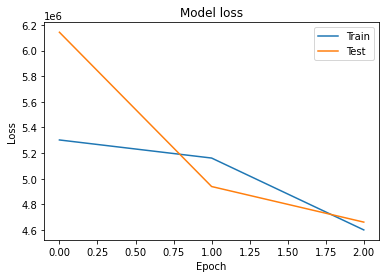

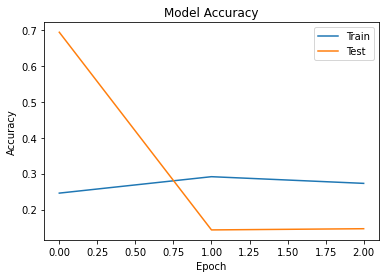

In [132]:
plot_loss_accuracy(history)

In [127]:
history.history

{'loss': [5302269.0, 5161207.5, 4600611.0],
 'accuracy': [0.24571429193019867, 0.2914285659790039, 0.272857129573822],
 'val_loss': [6142432.5, 4939088.5, 4661467.5],
 'val_accuracy': [0.6933333277702332, 0.1433333307504654, 0.14666666090488434]}

----

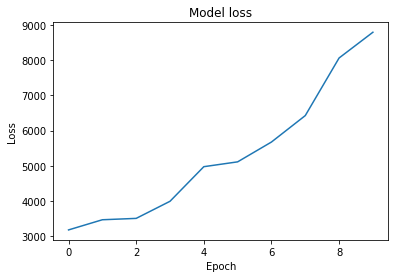

In [120]:
plot_history(history)

In [106]:
#now save the model
from tensorflow.keras import models

models.save_model(model, 
                  '../../../localdata/models/dummymodel_good!',  #filepath
                  overwrite=True, 
                  include_optimizer=True, #important hehe
)     

INFO:tensorflow:Assets written to: ../../../localdata/models/dummymodel_good!\assets


In [ ]:
#if you want to save it use:

'''tf.keras.models.load_model(
    filepath, custom_objects=None, compile=True, options=None)
'''

----

# to do 

[check the docs!](https://www.tensorflow.org/api_docs/python/tf/keras/models)

In [ ]:
from tensorflow.keras import models

'''save it'''
from tensorflow.keras import models

models.save_model(model, 
                  'my_model',  #filepath
                  overwrite=True, 
                  include_optimizer=True, #important hehe
                  save_format=None,      #dunno
                  signatures=None,     #also dunno
                  options=None)      #also also also dunno


'''and you can load it somewhere else :'''
loaded_model = models.load_model('my_model', 
                           custom_objects=None,  #dunno 
                           compile=True,  #compile it after loading? y/n
                           options=None) #also dunno

In [ ]:
import pickle

# Load pipeline from pickle file
my_pipeline = pickle.load(open("../03-Tuning-Pipeline/pipeline.pkl","rb"))

my_pipeline